1. iris 데이터셋에서 임의의 샘플을 선택.     
2. 선택한 샘플의 특성을 유지한채 조금씩 회전을 한다. (특성벡터를 회전행렬과 행렬곱)
3. 새로운 회전된 샘플을 데이터셋이 추가.

In [1]:
import pandas as pd
import numpy as np
import random
import math

In [2]:
iris = pd.read_csv("/kaggle/input/data-iris/iris.csv")
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Target과 Feature 구분
iris_feature = iris[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
iris_target = iris['Name']

In [6]:
# 데이터 회전 함수
def rotate_sample(sample, angle):
    theta = math.radians(angle)
    rotation_matrix = np.array([
        [math.cos(theta), -math.sin(theta)],
        [math.sin(theta), math.cos(theta)]
    ])
    rotated_sample = np.dot(rotation_matrix, sample)
    return rotated_sample

In [7]:
# 데이터셋중 SepalLength, SepalWidth를 회전하여 데이터 증강 
augmented_feature = []
augmented_target = []

for i in range(len(iris_feature)):
    # 각 샘플마다 회전할 각도를 랜덤으로 선택
    angle = random.uniform(0, 3)
    rotated_sample = rotate_sample(iris_feature.iloc[i,:2], angle)
    augmented_feature.append(rotated_sample)
    augmented_target.append(iris_target[i])

#  증강된 데이터셋 크기
print("원본 데이터 수:", len(iris_feature))
print("증강 데이터 수:", len(augmented_feature))

원본 데이터 수: 150
증강 데이터 수: 150


In [8]:
augmented_feature[:5]

[array([5.06532046, 3.55000403]),
 array([4.86824432, 3.05126159]),
 array([4.68423892, 3.22302742]),
 array([4.44616105, 3.31687382]),
 array([4.9187251 , 3.71027538])]

In [11]:
iris_feature.iloc[:5,:2]

,SepalLength,SepalWidth
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [12]:
augmented_target[:5]

['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa']

In [13]:
# 데이터프레임 만들기
df_augmented = pd.DataFrame(augmented_feature, columns=['SepalLength', 'SepalWidth'])
df_augmented

,SepalLength,SepalWidth
0,5.065320,3.550004
1,4.868244,3.051262
2,4.684239,3.223027
3,4.446161,3.316874
4,4.918725,3.710275
...,...,...
145,6.567303,3.280325
146,6.290755,2.523173
147,6.484052,3.034315
148,6.186539,3.424432


---
### Scatter로 확인해 보기

In [14]:
import matplotlib.pyplot as plt

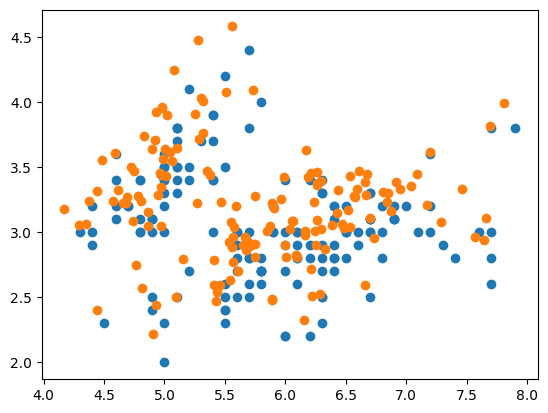

In [16]:
plt.scatter(
    iris_feature['SepalLength'],
    iris_feature['SepalWidth']
)

plt.scatter(
    df_augmented['SepalLength'],
    df_augmented['SepalWidth']
)


plt.show()

---
### 데이터셋중 PetalLength, PetalWidth를 회전하여 데이터 증강

In [17]:
# 데이터셋중 PetalLength, PetalWidht를 선택 
augmented_feature = []
augmented_target = []

for i in range(len(iris_feature)):
    # 각 샘플마다 회전할 각도를 랜덤으로 선택
    angle = random.uniform(0, 3)
    rotated_sample = rotate_sample(iris_feature.iloc[i,2:4], angle)
    augmented_feature.append(rotated_sample)
    augmented_target.append(iris_target[i])

#  증강된 데이터셋 크기
print("원본 데이터 수:", len(iris_feature))
print("증강 데이터 수:", len(augmented_feature))

원본 데이터 수: 150
증강 데이터 수: 150


In [18]:
augmented_feature[:5]

[array([1.3946902 , 0.23417781]),
 array([1.39263822, 0.24608693]),
 array([1.28808696, 0.26614278]),
 array([1.49268731, 0.24876612]),
 array([1.3959075 , 0.22680882])]

In [19]:
augmented_target[:5]

['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa']

In [20]:
# 데이터프레임 만들기
df_augmented2 = pd.DataFrame(augmented_feature, columns=['PetalLength', 'PetalWidth'])
df_augmented2

,PetalLength,PetalWidth
0,1.394690,0.234178
1,1.392638,0.246087
2,1.288087,0.266143
3,1.492687,0.248766
4,1.395908,0.226809
...,...,...
145,5.189490,2.323616
146,4.914165,2.112105
147,5.131282,2.170240
148,5.394676,2.312459


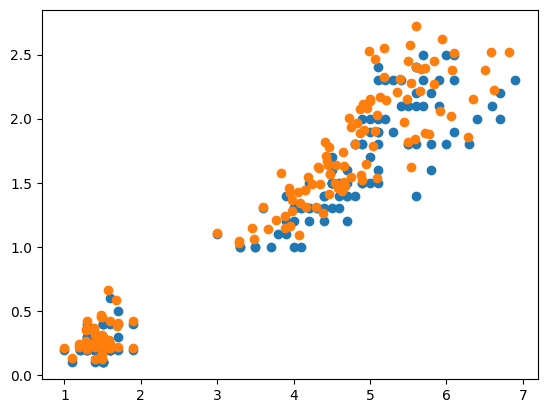

In [23]:
plt.scatter(
    iris_feature['PetalLength'],
    iris_feature['PetalWidth']
)

plt.scatter(
    df_augmented2['PetalLength'],
    df_augmented2['PetalWidth']
)


plt.show()

In [24]:
# Target Column으로 데이터프레임 만들기
df_target = pd.DataFrame(augmented_target, columns=['Name'])
df_target

,Name
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


---
#### 증강데이터를 데이터프레임으로 만들기

In [25]:
data2 = pd.concat([df_augmented, df_augmented2, df_target], axis='columns')
data2.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.065320,3.550004,1.394690,0.234178,Iris-setosa
1,4.868244,3.051262,1.392638,0.246087,Iris-setosa
2,4.684239,3.223027,1.288087,0.266143,Iris-setosa
3,4.446161,3.316874,1.492687,0.248766,Iris-setosa
4,4.918725,3.710275,1.395908,0.226809,Iris-setosa


In [26]:
data2.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
145,6.567303,3.280325,5.189490,2.323616,Iris-virginica
146,6.290755,2.523173,4.914165,2.112105,Iris-virginica
147,6.484052,3.034315,5.131282,2.170240,Iris-virginica
148,6.186539,3.424432,5.394676,2.312459,Iris-virginica
149,5.874277,3.050061,5.063172,1.901130,Iris-virginica


---
### 원본데이터를 머신러닝 적용

In [27]:
# Train과 Test 분리

from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = \
                        train_test_split(
                            iris_feature,
                            iris_target,
                            random_state=42,
                            stratify=iris_target
                        )

In [28]:
# 데이터를 학습하고 예측하기
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(train_data, train_label)

RandomForestClassifier()

In [30]:
clf.score(train_data, train_label)

1.0

In [31]:
clf.score(test_data, test_label)

0.9210526315789473

### Cross Validation

In [32]:
from sklearn import model_selection
scores = model_selection.cross_val_score(clf, iris_feature, iris_target, cv=6)
print("각각의 정답률:", scores)
print("평균 정답률 :", scores.mean())

각각의 정답률: [0.96 1.   0.92 0.92 0.92 1.  ]
평균 정답률 : 0.9533333333333333


---
### 증강 데이터를 머신러닝 적용

In [33]:
# Target, Feature 구분
iris_feature = data2[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
iris_target = data2['Name']

In [34]:
# Train과 Test 분리
train_data, test_data, train_label, test_label = \
                        train_test_split(
                            iris_feature,
                            iris_target,
                            random_state=42,
                            stratify=iris_target
                        )

In [35]:
# 학습 시키기
clf = RandomForestClassifier()
clf.fit(train_data, train_label)

RandomForestClassifier()

In [36]:
scores = model_selection.cross_val_score(clf, iris_feature, iris_target, cv=6)
print("각각의 정답률:", scores)
print("평균 정답률 :", scores.mean())

각각의 정답률: [0.96 1.   0.92 0.92 0.88 1.  ]
평균 정답률 : 0.9466666666666667


----
### 원본 + 증강데이터를 머신러닝 적용

In [37]:
data = pd.concat([iris, data2], axis='rows')
data = data.reset_index(drop=True)
data.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
295,6.567303,3.280325,5.189490,2.323616,Iris-virginica
296,6.290755,2.523173,4.914165,2.112105,Iris-virginica
297,6.484052,3.034315,5.131282,2.170240,Iris-virginica
298,6.186539,3.424432,5.394676,2.312459,Iris-virginica
299,5.874277,3.050061,5.063172,1.901130,Iris-virginica


In [38]:
# Target, Feature 구분
iris_feature = data[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
iris_target = data['Name']

In [39]:
# Train과 Test 분리
train_data, test_data, train_label, test_label = \
                        train_test_split(
                            iris_feature,
                            iris_target,
                            random_state=42,
                            stratify=iris_target
                        )

In [40]:
# 학습 시키기
clf = RandomForestClassifier()
clf.fit(train_data, train_label)

RandomForestClassifier()

In [41]:
scores = model_selection.cross_val_score(clf, iris_feature, iris_target, cv=6)
print("각각의 정답률:", scores)
print("평균 정답률 :", scores.mean())

각각의 정답률: [0.98 0.94 1.   0.98 0.96 0.96]
평균 정답률 : 0.9699999999999999


In [42]:
import joblib

In [45]:
joblib.dump(clf, "./rf.h5")

['./rf.h5']